<a href="https://colab.research.google.com/github/hy05sprsea/KIKAGAKU-Tutorial/blob/master/KIKAGAKU_%E7%95%B3%E3%81%BF%E8%BE%BC%E3%81%BF%E3%83%8B%E3%83%A5%E3%83%BC%E3%83%A9%E3%83%AB%E3%83%8D%E3%83%83%E3%83%88%E3%83%AF%E3%83%BC%E3%82%AF%E3%81%AE%E5%AE%9F%E8%A3%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16425362235656899714
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 6779750477858296247
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 17623275447191118767
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11150726272
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2063272543092286969
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
train, test = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
len(train)

2

In [8]:
type(train[0])

numpy.ndarray

In [9]:
train[0]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:
# 1 目の要素の形を確認
train[0].shape

(60000, 28, 28)

サンプル数 : 60,000

高さ (height) : 28

幅 (width) : 28

チャネル数 (channel) : 1

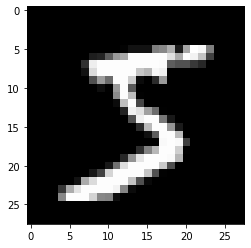

In [14]:
img = train[0][0]
plt.imshow(img, 'gray')

In [15]:
type(train[1])

numpy.ndarray

In [16]:
train[1]

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [19]:
train[1].shape

(60000,)

In [20]:
len(test)

2

In [21]:
test[1]

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [22]:
test[0].shape

(10000, 28, 28)

**TensorFlow で使用できる形式に変換**

**画像データの形を (height, width) から (height, width, channel) へと変換**

In [23]:
x_train = train[0].reshape(60000, 28, 28, 1)/ 255
x_test = test[0].reshape(10000, 28, 28, 1) / 255

In [25]:
x_train[0].shape

(28, 28, 1)

In [26]:
x_train[0].min(), x_train[0].max()

(0.0, 1.0)

In [27]:
t_train = train[1]
t_test = test[1]

In [28]:
x_train, x_test = x_train.astype('float32'), x_test.astype('float32')
t_train, t_test = t_train.astype('int32'), t_test.astype('int32')

In [29]:
import os, random

def reset_seed(seed=0):
    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

In [31]:
from tensorflow.keras import models, layers

reset_seed(0)

# モデルの構築
model = models.Sequential([
    # 特徴量抽出
    layers.Conv2D(filters=3, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPool2D(pool_size=(2, 2)),
    # ベクトル化
    layers.Flatten(),
    # 識別
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 3)         30        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 3)         0         
_________________________________________________________________
flatten (Flatten)            (None, 507)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               50800     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 51,840
Trainable params: 51,840
Non-trainable params: 0
_________________________________________________________________


カーネルのサイズ : 3×3

入力のチャネル数 : 11

出力のチャネル数 : 33

重みの数 : 3×3×1×3=27

バイアスの数 : 33

合計のパラメータの数 : 27+3=30

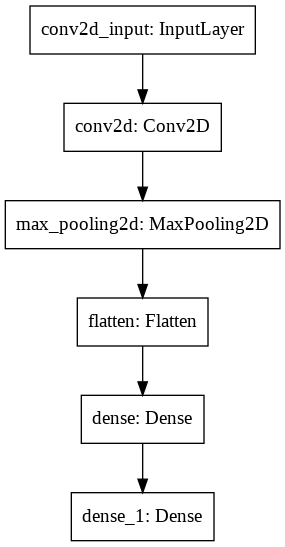

In [34]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [37]:
# optimizerの設定
optimizer = tf.keras.optimizers.Adam(lr=0.01)

# モデルのコンパイル
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
batch_size = 4096
epochs = 30

history = model.fit(x_train, t_train,
                    batch_size=batch_size,
                    epochs=epochs, verbose=1,
                    validation_data=(x_test, t_test))

Epoch 1/30
15/15 [==============================] - 1s 46ms/step - loss: 0.8988 - accuracy: 0.7390 - val_loss: 0.3954 - val_accuracy: 0.8911
Epoch 2/30
15/15 [==============================] - 0s 24ms/step - loss: 0.3349 - accuracy: 0.9030 - val_loss: 0.2814 - val_accuracy: 0.9166
Epoch 3/30
15/15 [==============================] - 0s 23ms/step - loss: 0.2482 - accuracy: 0.9259 - val_loss: 0.2085 - val_accuracy: 0.9362
Epoch 4/30
15/15 [==============================] - 0s 22ms/step - loss: 0.1983 - accuracy: 0.9413 - val_loss: 0.1792 - val_accuracy: 0.9432
Epoch 5/30
15/15 [==============================] - 0s 22ms/step - loss: 0.1636 - accuracy: 0.9509 - val_loss: 0.1536 - val_accuracy: 0.9534
Epoch 6/30
15/15 [==============================] - 0s 23ms/step - loss: 0.1396 - accuracy: 0.9580 - val_loss: 0.1282 - val_accuracy: 0.9606
Epoch 7/30
15/15 [==============================] - 0s 22ms/step - loss: 0.1210 - accuracy: 0.9636 - val_loss: 0.1178 - val_accuracy: 0.9645
Epoch 8/30
15

In [39]:
!nvidea-smi

/bin/bash: nvidea-smi: command not found


In [40]:
# 学習結果を確認
results = pd.DataFrame(history.history)
results.tail(3)

,loss,accuracy,val_loss,val_accuracy
27,0.022654,0.993150,0.069537,0.9802
28,0.022764,0.992867,0.074131,0.9792
29,0.024245,0.992217,0.068089,0.9811


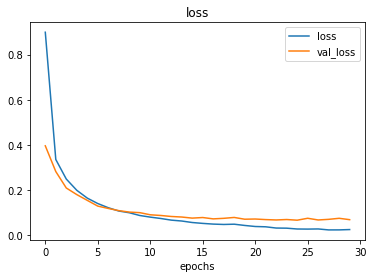

In [42]:
# 損失を可視化
results[['loss', 'val_loss']].plot(title='loss')
plt.xlabel('epochs');

Text(0.5, 0, 'epochs')

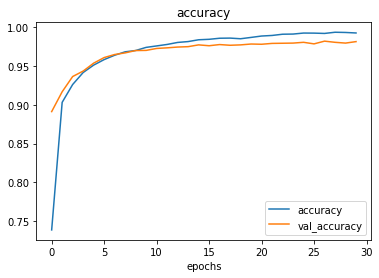

In [43]:
# 正解率を可視化
results[['accuracy', 'val_accuracy']].plot(title='accuracy')
plt.xlabel('epochs')

In [45]:
# 推論に使用するデータを切り出し + バッチサイズの追加
x_sample = np.array([x_train[0]])
x_sample.shape

(1, 28, 28, 1)

In [46]:
model.layers

**層のインデックス番号を使用すると特定の層の取り出しを行うことが可能**

In [48]:
model.layers[0].get_weights()

[array([[[[-0.8363724 , -0.7892009 ,  0.33914393]],
 
         [[ 0.31432995, -0.3108211 ,  0.55960107]],
 
         [[ 0.51118994,  0.58993924,  0.25651917]]],
 
 
        [[[-0.8880287 , -0.3311419 ,  0.3692685 ]],
 
         [[-0.139109  ,  0.07808543,  0.26560107]],
 
         [[ 0.65712935,  0.62146616,  0.2900871 ]]],
 
 
        [[[-0.14111704, -0.25058818, -0.32028687]],
 
         [[-0.82912403,  0.5407418 ,  0.29797232]],
 
         [[ 0.37739643,  0.07436908,  0.39594403]]]], dtype=float32),
 array([ 0.08632094,  0.00589891, -0.01533376], dtype=float32)]

In [64]:
output = model.layers[0](x_sample) # convolution 層の計算(1層目)
output = output[0].numpy() # NumPy の ndarray オブジェクトに変換

In [55]:
output.shape

(26, 26, 3)

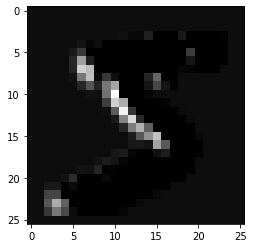

In [65]:
# 1 つ目の出力
plt.imshow(output[:, :, 0], 'gray')

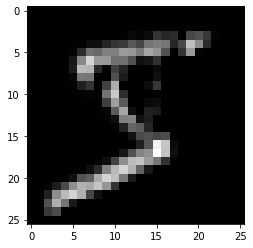

In [66]:
# 2 つ目の出力
plt.imshow(output[:, :, 1], cmap='gray');

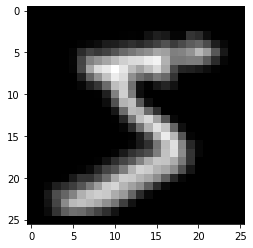

In [67]:
# 3 つ目の出力
plt.imshow(output[:, :, 2], cmap='gray');

In [68]:
output = model.layers[0](x_sample)
output = model.layers[1](output)
output = output[0].numpy()

In [69]:
output.shape

(13, 13, 3)

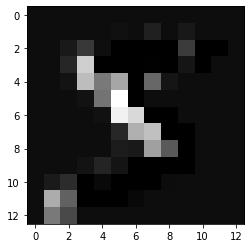

In [70]:
# 1 つ目の出力
plt.imshow(output[:, :, 0], 'gray');

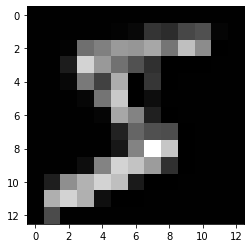

In [71]:
# 2 つ目の出力
plt.imshow(output[:, :, 1], cmap='gray');

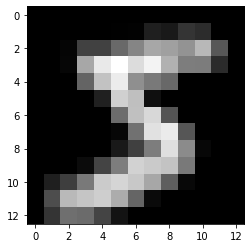

In [72]:
# 3 つ目の出力
plt.imshow(output[:, :, 2], cmap='gray');

出力の形は (13, 13, 3)

**507 次元のベクトルに変換されていることを確認**

In [77]:
output = model.layers[0](x_sample) # convolution 層の計算
output = model.layers[1](output) # pooling 層の計算（サイズを 1/2 に変換）
output = model.layers[2](output) # ベクトル化
output = output[0].numpy()

In [76]:
output.shape

(507,)